# **M508B Big Data Analytics**

Kirti Anand: GH1023762

This is my Final Project for Big Data Analytics module.


**Introduction -**

In the world of data we receive plently of data through the internet everyday we came across the different types of news data out of which it is hard to believe which one is real and which one is misinformation which is a big concern in today's time.

The dataset which I am using in this project is collected from different sources such as news articles, news channels, newspaper websites and social media.


**About Data -**

Dataset has different behaviour of news data which includes some news as be fake, some news are to express hate, and some news are published just for fun. Taking all this to the consideration I have created a model with a chat bot which will predict the autheticity of the news which is posted only and analyse the sentiment of the news if it is a positve news, a negative news or a neutral news.

**Dataset -**
www.kaggle.com. (n.d.). Source based Fake News Classification. [online] Available at: https://www.kaggle.com/datasets/ruchi798/source-based-news-classification.

‌

Following are the steps involved in the project to achieve the goal -

1. Downloading and Importing Key Libraries
2. Data loading and data preprocession
3. Text processing
4. Model building
5. Sentiment Analysis



# **Downloading and Importing Libraries**

Downloaded all the required NLTK resources such as tokenizers, stopwords, wordnet, punkt, and NER using the nltk.download() function.


**Imported following libraries:**


pandas: Used for data manipulation and analysis.

numpy: It supports for mathematical operations on arrays and matrices.

tensorflow: A powerful deep learning network used for building and training neural networks.

nltk (Natural Language Toolkit): Used to perform natural language processing tasks.

matplotlib: Used for creating visualizations, such as plots and graphs.

en_core_web_sm: A small English model for spaCy used for text classification.

spacy: A library for natural language processing and textual analysis.

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import en_core_web_sm
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from wordcloud import WordCloud

from nltk import pos_tag, ne_chunk

from nltk.probability import FreqDist

from spacy import displacy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('vader_lexicon')

Loading the dataset using pandas.

To have a quick look on our dataset I have used head()

In [ ]:
data = pd.read_csv('news_articles.csv')
data.head()

Checking the unique values for each column in the data

In [ ]:
data.nunique()

Checking the data information

In [ ]:
data.info()

Checking the missing data and dropping the not required data from the dataset

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(inplace = True)
data.isnull().sum()

Assigning the values of the text and label

In [7]:
text_data = data['text'].values
labels = data['label'].values

# **Text Preprocessing**

Here I have defined a function to preprocess the text from the data set wherein I have followed the below steps.

1. Coverted text into lowercare
2. Tokenize text
3. Remove Stopwords
4. Lemmatize tokens
5. Converting tokens back to text

In [8]:
def preprocess_text(text):
    if isinstance(text, str):

        text = text.lower()

        tokens = word_tokenize(text)

        stop_words = set(stopwords.words("english"))
        tokens = [token for token in tokens if token.lower() not in stop_words]

        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        preprocessed_text = " ".join(tokens)

        return preprocessed_text
    else:
        return ""

data['text_preprocessed'] = data['text'].apply(preprocess_text)

data['tokenized_text'] = data['text_preprocessed'].apply(word_tokenize)

Counting the frequency of words and Plotting the commonly used words.

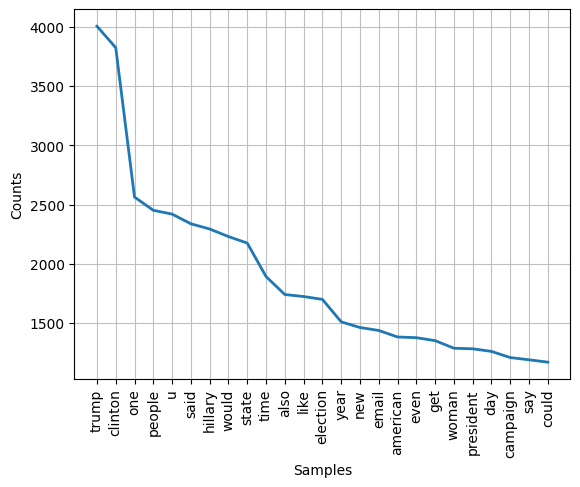

In [9]:
all_words = [word for tokens in data['text_preprocessed'] if isinstance(tokens, str) for word in tokens.split()]
frequent_dist = FreqDist(all_words)

if len(all_words) > 0:
    frequent_dist.plot(25)

Displaying the most used words in word cloud

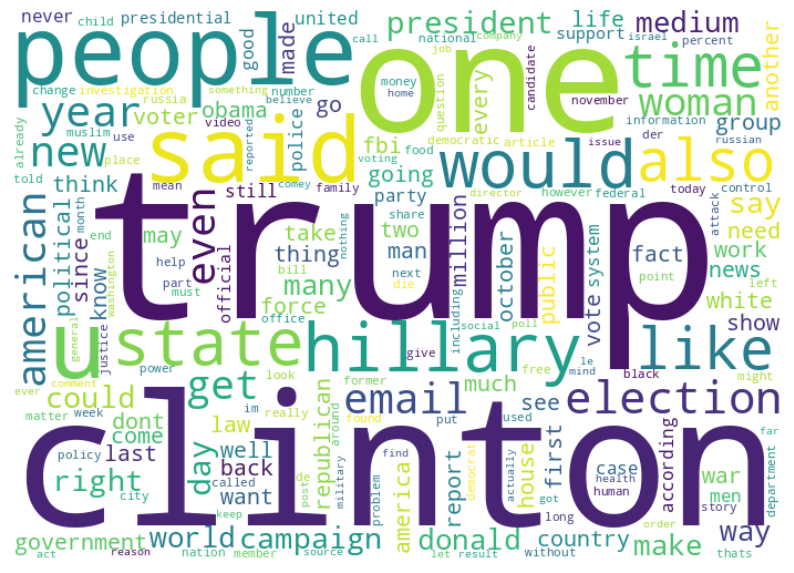

In [10]:
wordcloud = WordCloud(width=700, height=500, background_color='white').generate_from_frequencies(frequent_dist)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Performed multiple natural language processing tasks on the text data using NLTK and Spacy which are listed below.

1. Part-of-Speech(POS) tagging to the tokenized text.
2. Named Entity Recognition (NER) to the POS-tagged text using ne_chunk  to identify and classify named entities in the text.
3. Create chunks to define a grammar pattern

In [11]:
data['pos_tags'] = data['tokenized_text'].apply(pos_tag)

data['ner'] = data['pos_tags'].apply(ne_chunk)

grammar = r"NP: {<DT>?<JJ>*<NN>}"

chunk_parser = nltk.RegexpParser(grammar)

data['chunked_text'] = data['pos_tags'].apply(lambda x: chunk_parser.parse(x))

for chunked_sentence in data['chunked_text']:
    print(chunked_sentence)

def extract_entities(ner):
    entities = []
    for chunk in ner:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            entities.append(' '.join(c[0] for c in chunk))
    return entities

data['entities'] = data['ner'].apply(extract_entities)

nlp = spacy.load('en_core_web_sm')
for entities in data['entities']:
    doc = ' '.join(entities)
    doc = nlp(doc)
    displacy.render(doc, style='ent', jupyter=True)

Streaming output truncated to the last 5000 lines.
  (NP medal/JJ freedom/NN)
  (NP several/JJ celebrity/NN)
  (NP last/JJ time/NN)
  ever/RB
  (NP hand/NN)
  (NP medal/NN))
(S
  (NP writer/NN)
  swedish/JJ
  democrat/NNP
  (NP party/NN)
  (NP member/NN)
  (NP parliament/NN)
  anna/RB
  (NP hagwall/NN)
  announced/VBD
  (NP resignation/NN)
  (NP party/NN)
  (NP post/NN)
  stand/VBP
  (NP reelection/NN)
  (NP furor/NN)
  following/VBG
  (NP exposure/NN)
  (NP fact/NN)
  (NP single/JJ family/NN)
  (NP jew/NN)
  (NP control/NN)
  (NP swedish/JJ medium/NN)
  one/CD
  (NP jewish/NN)
  (NP family/NN)
  (NP help/NN)
  (NP brainwash/NN)
  (NP entire/JJ population/NN)
  (NP sweden/NN)
  (NP swedish/JJ mp/NN)
  (NP enough/JJ uproar/NN)
  followed/VBD
  (NP letter/NN)
  (NP aftonbladet/NN)
  (NP newspaper/NN)
  said/VBD
  (NP ethnicity/NN)
  (NP factor/NN)
  determining/VBG
  (NP medium/NN)
  (NP ownership/NN)
  percentan/VBP
  (NP obvious/JJ reference/NN)
  jewish/JJ
  bonnier/JJR
  (NP family/N

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting text data and labels data from our DataFrame.


*   The text data is tokenized using Tokenizer class from TensorFlow
     python library.

*   The labels are encoded using LabelEncoder from scikit-learn python
     library.



In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [13]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

Spliting the whole data into training set and testing set.

Further spliting in X Train and Y Train

In [14]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
x_tn, x_tt, y_tn, y_tt = train_test_split(sequences, labels, test_size=0.2, random_state=42)


# **Text Preprocessing**


Droping rows which has NaN values in the training data

In [16]:
train_data = train_data.dropna(subset=['text_preprocessed', 'label'])

Creating a TF-IDF vectorizer to transform the text data into numerical data.
Fitting the vectorizer on the training data and transforming the training data and testing data.


In [17]:
vectorizer = TfidfVectorizer()

train_features = vectorizer.fit_transform(train_data['text_preprocessed'])

test_features = vectorizer.transform(test_data['text_preprocessed'])

Droping rows with NaN values in the testing data

In [18]:
test_data = test_data.dropna(subset=['text_preprocessed', 'label'])

Creating AdaBoost Classifier and training the model on features and labels.

After that getting the predictions of the test features.

In [19]:
boost_model = AdaBoostClassifier()

boost_model.fit(train_features, train_data['label'])

predictions = boost_model.predict(test_features)

test_data['Predicted_Label'] = predictions

test_data[['text_preprocessed', 'label', 'Predicted_Label']].head(3)

,text_preprocessed,label,Predicted_Label
305,november pm predicted donald trump victory ele...,Real,Real
1284,nili nathan posted friday october edt keywords...,Fake,Fake
368,kingdom energy minister say move would risk da...,Fake,Real


I have created a sequential model using TensorFlow Keras for the text classification.


In our model, I have used the following steps -

1. Embedding Layer is used to handle textual data which convert words into numerical vectors.

2. Flatten Layer is used to flatten the input into a one-dimensional tensor

3. Dense Layer is used for multiple times with the specification of units and uses activation function as ReLu and softmax activation function.

Then the model is compiled with the sparse_categorical_crossentropy loss function. The Adam optimizer is used and specified accuracy metric.

To get a summary of the model architecture, the model.summary() function is called.

** The values of vocab_size, embedding_dim, and max_length is considered   as per the dataset.

It undergoes training using the training data and evaluation using the test data.

In [20]:
vocab_size = 20000
oov_token = "<OOV>"
embedding_dim = 100
max_length = 140
padding = 'post'

In [ ]:
mod_emb = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

mod_emb.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
mod_emb.summary()

Plotting the graph of each predicted label which is 'Fake' or 'Real'

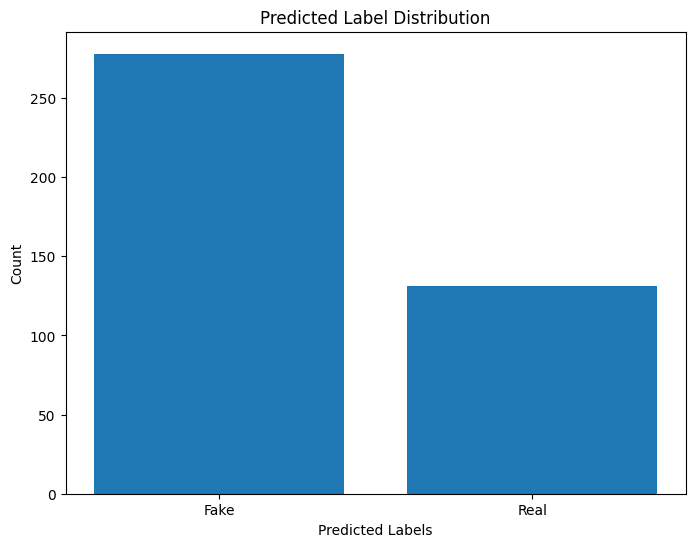

In [22]:
label_counts = test_data['Predicted_Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Distribution')
plt.show()

Predicting the labels for the testing features and evaluating the model's performance.

In [ ]:
predictions = boost_model.predict(test_features)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_data['label'], predictions)
precision = precision_score(test_data['label'], predictions, pos_label='Real')
recall = recall_score(test_data['label'], predictions, pos_label='Real')
f1 = f1_score(test_data['label'], predictions, pos_label='Real')

print("Accuracy:", accuracy * 100, '%')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# **Sentiment Analysis**

According to the analysis creating a user input function throught which user is asked about the type of news articles for the results.
Results will display the title of the news, author and sentiment analysis score.

Creating sentiment analyzer object.

In [24]:
sentiment_analyzer = SentimentIntensityAnalyzer()

Checking the different types of news present in the data which are listed below:
(bias, conspiracy, bs(bullshit), satire, hate, junksci(junk science), state)


In [25]:
news_types = data['type'].unique()

Taking the user input for the type of news

In [26]:
news_type = input("Enter the type of news (bias, conspiracy, bs, satire, hate, junksci, state): ")

Enter the type of news (bias, conspiracy, bs, satire, hate, junksci, state): conspiracy


Checking the valid news type ad filtering the data.

Created a reccomendation feature using fitted vectorizer.

Predicting the probabilities of being real news for recommendations.

Adding sentiment score and displaying in percentage format.

Displying top 2 unbaised articles with sentiment score.

In [27]:
while news_type not in news_types:
    print("Invalid type of news. Please try again.")
    news_type = input("Enter the type of news (bias, conspiracy, bs, satire, hate, junksci, state): ")

filtered_data = test_data[test_data['type'] == news_type]

recommendation_features = vectorizer.transform(filtered_data['text_preprocessed'])

filtered_data['prob_real'] = boost_model.predict_proba(recommendation_features)[:, 1]

filtered_data['sentiment_score'] = filtered_data['text_preprocessed'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

filtered_data['sentiment_score_percentage'] = filtered_data['sentiment_score'] * 100

recommendations = filtered_data.sort_values('prob_real', ascending=False)

top_recommendations = recommendations.head(2)

for index, row in top_recommendations.iterrows():
    print("Title:", row['title'])
    print("Author:", row['author'])
    print("Sentiment Score: {:.2f}%".format(row['sentiment_score_percentage']))
    print("_______________________________________________")

<ipython-input-27-dc7fa879bf86>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['prob_real'] = boost_model.predict_proba(recommendation_features)[:, 1]


Title: wikileaks email clinton operative thinks black voters are stupid
Author: admin
Sentiment Score: -99.94%
_______________________________________________
Title: college warns against deplorable and problematic costumes
Author: admin
Sentiment Score: -97.35%
_______________________________________________


<ipython-input-27-dc7fa879bf86>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_score'] = filtered_data['text_preprocessed'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
<ipython-input-27-dc7fa879bf86>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_score_percentage'] = filtered_data['sentiment_score'] * 100


Using TextBlob library from Python to get sentiment type (positive, negative, or neutral) with sentiment score

*   If the user provides improper information then the sentiment type will display as 'Neutral' else 'Positive' or 'Negative' as per the input


In [28]:
from textblob import TextBlob

new_article = input("Enter the new article: ")

blob = TextBlob(new_article)
sentiment_score = blob.sentiment.polarity

if sentiment_score > 0:
    sentiment_type = "Positive"
elif sentiment_score < 0:
    sentiment_type = "Negative"
else:
    sentiment_type = "Neutral"

print("Sentiment Score:", sentiment_score)
print("Sentiment Type:", sentiment_type)

Enter the new article: hbnnk,mkhvjnm ,mnikoooo,
Sentiment Score: 0.0
Sentiment Type: Neutral


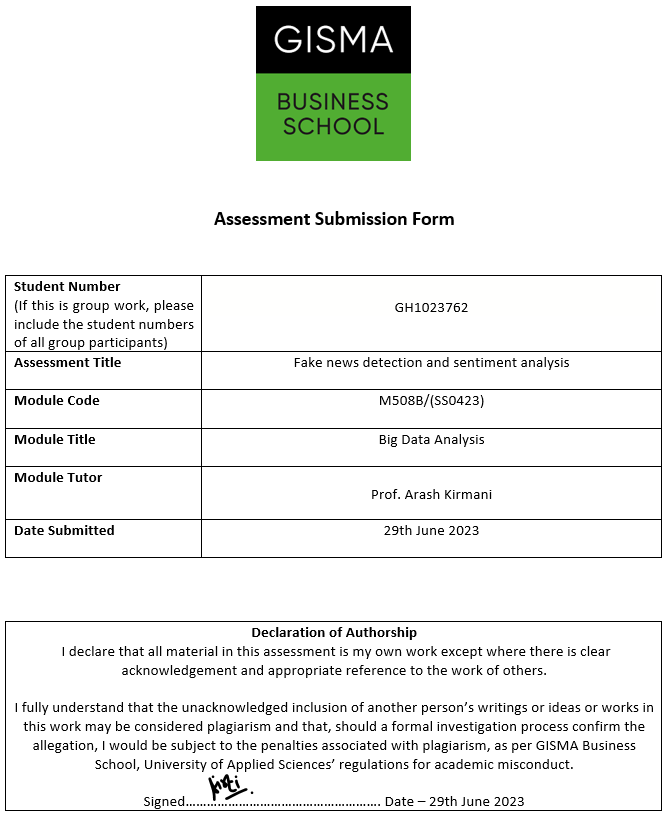

In [29]:
!jupyter nbconvert --to html M508.ipynb

[NbConvertApp] Converting notebook M508.ipynb to html
[NbConvertApp] Writing 1265490 bytes to M508.html
